In [14]:
#def GenBankFeatureImport(gbFile):

path = "../metaData/Wuhan_Hu_1.gb"

gb = open(path)
for line in gb.readlines():
    if "source" in line:#line.startswith("source"):
        print(line.strip().split(" ")[-1].split('..'))
    if "gene" in line:
        print(line)


['1', '29903']
     gene            266..21555

                     /gene="orf1ab"

                     /gene="orf1ab"

     gene            21563..25384

                     /gene="S"

                     /gene="S"

     gene            25393..26220

                     /gene="ORF3a"

                     /gene="ORF3a"

     gene            26245..26472

                     /gene="E"

                     /gene="E"

     gene            26523..27191

                     /gene="M"

                     /gene="M"

     gene            27202..27387

                     /gene="ORF6"

                     /gene="ORF6"

     gene            27394..27759

                     /gene="ORF7a"

                     /gene="ORF7a"

     gene            27894..28259

                     /gene="ORF8"

                     /gene="ORF8"

     gene            28274..29533

                     /gene="N"

                     /gene="N"

     gene            29558..29674

                     /g

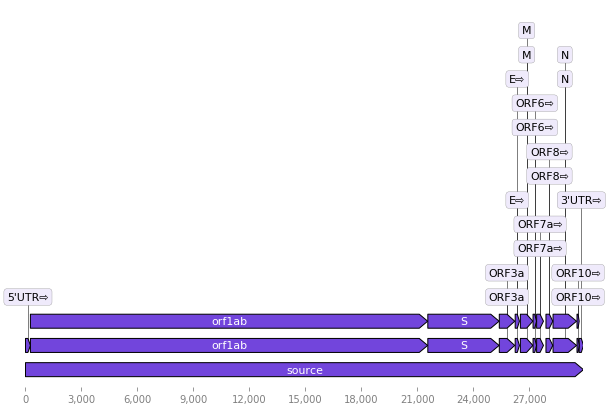

In [2]:
from dna_features_viewer import BiopythonTranslator
path = "/Users/Sung/Dropbox/lab/virus_data/CoV/rough2/"
file = "genbank_record/Wuhan_Hu_1.gb"
graphic_record = BiopythonTranslator().translate_record(path+file)
ax, _ = graphic_record.plot(figure_width=10, strand_in_label_threshold=7)

(<matplotlib.axes._subplots.AxesSubplot at 0x11ad82160>,
 ({GF(Small feature, 0-20 (1)): 0,
   GF(Gene 1 with a very long name, 20-500 (1)): 0,
   GF(Gene 2, 400-700 (-1)): 1.0,
   GF(Gene 3, 600-900 (1)): 0},
  {GF(Gene 1 with a very long name, 20-500 (1)): {'feature_y': 0,
    'annotation_y': 2.0},
   GF(Gene 2, 400-700 (-1)): {'feature_y': 1.0, 'annotation_y': 5.0},
   GF(Gene 3, 600-900 (1)): {'feature_y': 0, 'annotation_y': 4.0},
   GF(Small feature, 0-20 (1)): {'feature_y': 0, 'annotation_y': 3.0}}))

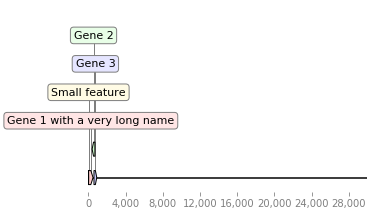

In [1]:
from dna_features_viewer import GraphicFeature, GraphicRecord
%matplotlib inline
features=[
    GraphicFeature(start=0, end=20, strand=+1, color="#ffd700",
                   label="Small feature"),
    GraphicFeature(start=20, end=500, strand=+1, color="#ffcccc",
                   label="Gene 1 with a very long name"),
    GraphicFeature(start=400, end=700, strand=-1, color="#cffccc",
                   label="Gene 2"),
    GraphicFeature(start=600, end=900, strand=+1, color="#ccccff",
                   label="Gene 3")
]
record = GraphicRecord(sequence_length=30000, features=features)
record.plot(figure_width=5)

In [2]:
from Bio import SeqIO

path = "/Users/Sung/Dropbox/lab/virus_data/novel-CoV/sequence/"
file = "2019_nCoV_020720_aln.fa"
gap = 7
orfs = ["orf1ab","S","orf3a","E","M","orf6","orf7a","orf8","N","orf10"]
start = [266,21563,25393,26245,26523,27202,27394,27894,28274,29558]
end = [21555,25384,26220,26472,27191,27387,27759,28259,29533,29674]

orf_dict = {}
#for orf, spos, epos in zip(orfs,start,end):
 #   recseqs = {}
  #  for record in SeqIO.parse(path+file,"fasta"):
   #     recseqs[record.id] = record.seq[spos+gap-1:epos+1-1]
    #orf_dict[orf] = recseqs


for orf, spos, epos in zip(orfs,start,end):
    recseqs = []
    for record in SeqIO.parse(path+file,"fasta"):
        record.seq = record.seq[spos+gap-1:epos+gap+1-1]
        recseqs.append(record)
    orf_dict[orf] = recseqs

    
for orf in orfs:
    with open(orf+"_"+file,"w") as f:
        SeqIO.write(orf_dict[orf],f,"fasta")